In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,station,temperature,green,red,nir,swir1,swir2
0,2023-09-23,4,19.4,3300,3386,4008,3560,3150
1,2023-09-23,8,16.7,1656,1636,3410,2748,2396
2,2023-09-23,16,15.9,1910,1906,3666,2672,2186
3,2023-09-23,18,19.4,1454,1409,3714,2800,2339
4,2023-09-23,24,17.7,3058,3410,4544,4110,3476


In [3]:
df.columns

Index(['date', 'station', 'temperature', 'green', 'red', 'nir', 'swir1',
       'swir2'],
      dtype='object')

In [4]:
df['date'].unique()

array(['2023-09-23', '2023-05-06', '2023-08-21', '2023-10-05',
       '2023-07-02', '2023-05-01', '2023-07-07', '2023-08-09',
       '2023-04-11', '2023-05-18', '2023-09-20', '2023-09-28',
       '2023-07-10', '2023-06-15', '2023-08-11', '2023-08-06',
       '2023-04-26', '2023-06-27', '2023-04-23', '2023-07-30',
       '2023-06-25', '2023-08-16', '2023-08-04', '2023-05-16',
       '2023-07-25', '2023-07-27', '2023-04-18', '2023-08-19',
       '2023-05-11', '2023-09-25', '2023-04-08', '2023-07-15',
       '2023-07-17', '2023-09-10', '2023-08-14', '2023-10-10',
       '2023-08-24', '2023-04-13', '2023-07-20', '2023-04-06',
       '2023-09-13'], dtype=object)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
def plot_date(date):
    filtered_df = df[df['date'] == date]

    x = filtered_df['temperature']
    #ndvi = (filtered_df['nir'] - filtered_df['red']) / (filtered_df['nir'] + filtered_df['red'])
    #x = ndvi
    
    # Gráfico de dispersión con línea de tendencia lineal
    sns.regplot(x=filtered_df['swir2'], y=filtered_df['temperature'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
    plt.xlabel('SWIR2')
    plt.ylabel('Temperature')
    plt.title('SWIR2 Dispersion vs Temperature with Linear Trend Line on Date ' + date)
    plt.show()

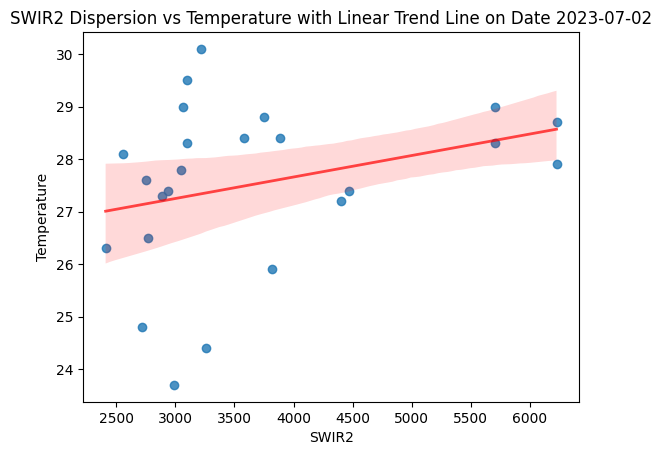

In [7]:
plot_date('2023-07-02')

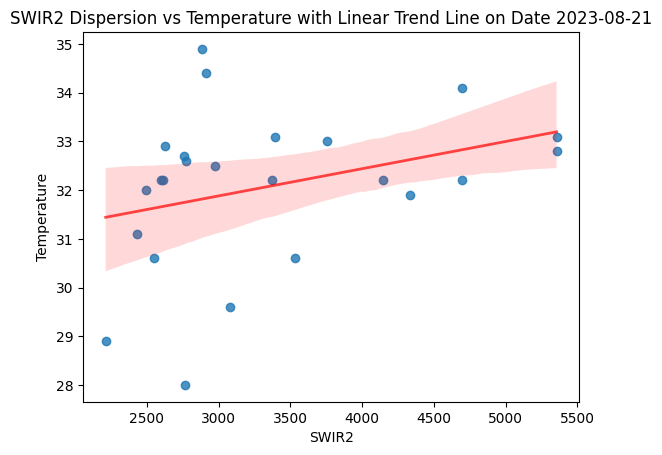

In [8]:
plot_date('2023-08-21')

In [9]:
def plot_station(station):
    filtered_df = df[df['station'] == station]
    
    # Gráfico de dispersión con línea de tendencia lineal
    sns.regplot(x=filtered_df['swir2'], y=filtered_df['temperature'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
    plt.xlabel('SWIR2')
    plt.ylabel('Temperature')
    plt.title('SWIR2 Dispersion vs Temperature with Linear Trend Line on Station ' + str(station))
    plt.show()

    correlation, p_value = stats.pearsonr(filtered_df['temperature'], filtered_df['swir2'])
    print(f'Pearson correlation coefficient: {correlation}, p-value: {p_value}')

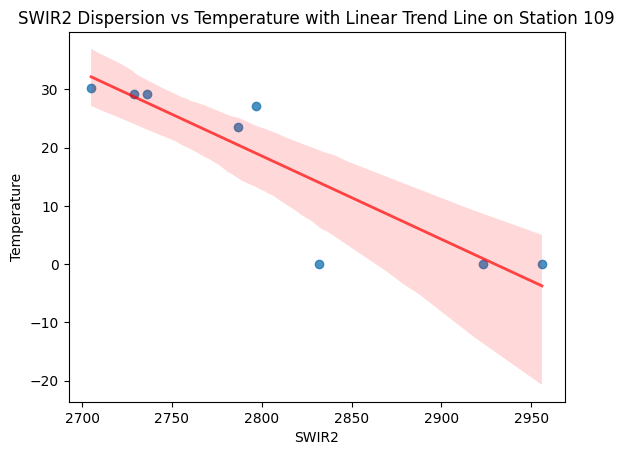

Pearson correlation coefficient: -0.895724429485117, p-value: 0.0026175141987837


In [10]:
plot_station(109)

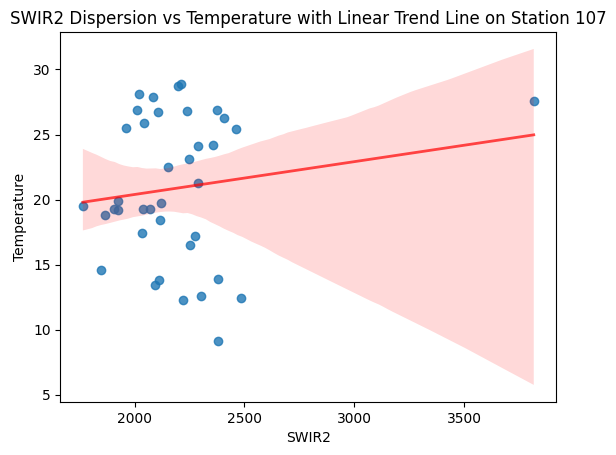

Pearson correlation coefficient: 0.14674129350499357, p-value: 0.3793311669848298


In [11]:
plot_station(107)

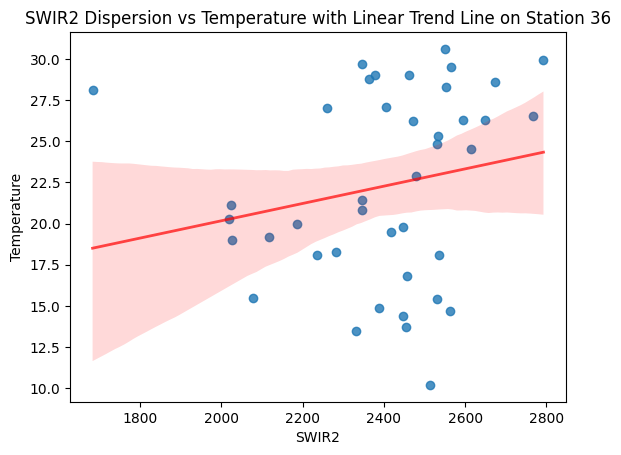

Pearson correlation coefficient: 0.20404745759568088, p-value: 0.20066868415400932


In [12]:
plot_station(36)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['nir', 'swir1', 'swir2']]
y = df['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
print(f'R^2: {r2_score(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')

# Features importance
importances = rf.feature_importances_
feature_names = ['nir', 'swir1', 'swir2']
for name, importance in zip(feature_names, importances):
    print(f'{name}: {importance}')

R^2: 0.22448695497274096
Mean Squared Error: 32.06051393081599
nir: 0.33881780391640776
swir1: 0.3372297018567564
swir2: 0.3239524942268359


In [17]:
rf.feature_importances_

array([0.3388178 , 0.3372297 , 0.32395249])

In [18]:
X_train

,nir,swir1,swir2
720,3645,4152,3960
192,4228,4010,3521
307,4256,4828,4680
923,2554,2624,2332
299,3376,2958,2576
...,...,...,...
106,3990,4303,3883
270,3348,2814,2480
860,2694,2803,2500
435,4066,4137,3550


## Diferenciales de valor

In [19]:
# Select station number
station1 = 4
station2 = 8

# Get values for each station
df1 = df[df['station'] == station1]
df2 = df[df['station'] == station2]

In [20]:
df1['temp_diff'] = df1['temperature'].diff()
df1['swir2_diff'] = df1['swir2'].diff()
df1 = df1.dropna()
df1.head()

/tmp/ipykernel_11327/2099088484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp_diff'] = df1['temperature'].diff()
/tmp/ipykernel_11327/2099088484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['swir2_diff'] = df1['swir2'].diff()


,date,station,temperature,green,red,nir,swir1,swir2,temp_diff,swir2_diff
25,2023-05-06,4,23.1,3360,3564,4042,3951,3583,3.7,433.0
49,2023-08-21,4,33.1,3372,3491,3940,3871,3396,10.0,-187.0
73,2023-10-05,4,24.0,3283,3409,3985,3531,3049,-9.1,-347.0
97,2023-07-02,4,28.4,3192,3358,3810,4055,3578,4.4,529.0
121,2023-05-01,4,21.7,3370,3562,4038,3850,3355,-6.7,-223.0


In [21]:
df2['temp_diff'] = df2['temperature'].diff()
df2['swir2_diff'] = df2['swir2'].diff()
df2 = df2.dropna()
df2.head()

/tmp/ipykernel_11327/3016641299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['temp_diff'] = df2['temperature'].diff()
/tmp/ipykernel_11327/3016641299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['swir2_diff'] = df2['swir2'].diff()


,date,station,temperature,green,red,nir,swir1,swir2,temp_diff,swir2_diff
26,2023-05-06,8,23.5,1974,1968,3980,3164,2824,6.8,428.0
50,2023-08-21,8,32.6,2246,2173,4128,3315,2773,9.1,-51.0
74,2023-10-05,8,22.5,1723,1661,3436,2764,2339,-10.1,-434.0
98,2023-07-02,8,27.8,2580,2484,4496,3597,3045,5.3,706.0
122,2023-05-01,8,21.3,1866,1814,4176,3051,2690,-6.5,-355.0


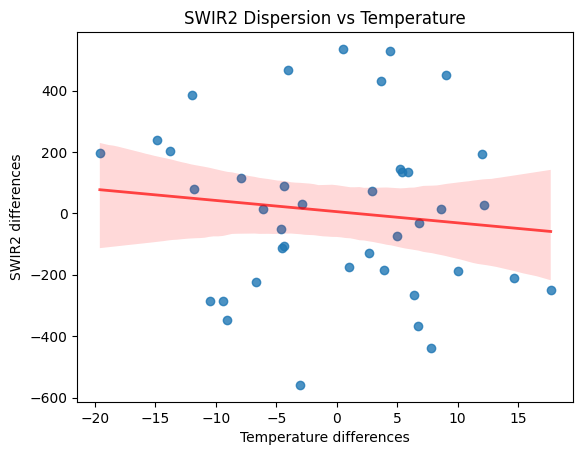

Pearson correlation coefficient: -0.11892153966107907, p-value: 0.4648551079296207


In [22]:
sns.regplot(x=df1['temp_diff'], y=df1['swir2_diff'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('Temperature differences')
plt.ylabel('SWIR2 differences')
plt.title('SWIR2 Dispersion vs Temperature')
plt.show()

correlation, p_value = stats.pearsonr(df1['temp_diff'], df1['swir2_diff'])
print(f'Pearson correlation coefficient: {correlation}, p-value: {p_value}')